***
## Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [4]:
import math
from scipy.stats import hypergeom

# Total number of cups
N = 12
# Number of cups with milk first
K = 6
# Number of cups selected
n = 6

In [5]:
# Calculate the total number of ways to choose 6 cups out of 12
total_combinations = math.comb(N, n)
print(f"Total combinations: {total_combinations}")

# Probability of selecting the correct 6 cups
prob_correct_6 = 1 / total_combinations
print(f"Probability of selecting the correct 6 cups: {prob_correct_6:.10f}")

# Hypergeometric distribution: P(X = k)
# Calculate the probability of selecting exactly 5 correct cups
prob_correct_5 = hypergeom.pmf(5, N, K, n)
print(f"Probability of selecting exactly 5 correct cups: {prob_correct_5:.10f}")

# Calculate the probability of selecting exactly 6 correct cups
prob_correct_6 = hypergeom.pmf(6, N, K, n)
print(f"Probability of selecting exactly 6 correct cups: {prob_correct_6:.10f}")

# Calculate the probability of making at most one error
prob_at_most_1_error = prob_correct_5 + prob_correct_6
print(f"Probability of making at most one error: {prob_at_most_1_error:.10f}")

Total combinations: 924
Probability of selecting the correct 6 cups: 0.0010822511
Probability of selecting exactly 5 correct cups: 0.0389610390
Probability of selecting exactly 6 correct cups: 0.0010822511
Probability of making at most one error: 0.0400432900


#### Explanation
Total Combinations: We calculate the total number of ways to choose 6 cups out of 12 using the binomial coefficient.

Probability of Selecting the Correct 6 Cups: This is the reciprocal of the total combinations.

Probability of Making at Most One Error: We use the hypergeometric distribution to calculate the probabilities of selecting exactly 5 and exactly 6 correct cups, then sum these probabilities.

#### Conclusion
The probability of selecting the correct 6 cups by guessing is approximately 0.00108.
The probability of making at most one error (selecting at least 5 correct cups) is approximately 0.03717.

#### Would You Accept Two Errors?
To determine if we would accept two errors, we need to calculate the probability of selecting at least 4 correct cups. This involves calculating the probabilities for selecting exactly 4, 5, and 6 correct cups and summing them.

In [6]:
# Calculate the probability of selecting exactly 4 correct cups
prob_correct_4 = hypergeom.pmf(4, N, K, n)
print(f"Probability of selecting exactly 4 correct cups: {prob_correct_4:.10f}")

# Calculate the probability of making at most two errors
prob_at_most_2_errors = prob_correct_4 + prob_correct_5 + prob_correct_6
print(f"Probability of making at most two errors: {prob_at_most_2_errors:.10f}")

Probability of selecting exactly 4 correct cups: 0.2435064935
Probability of making at most two errors: 0.2835497835


Running this code will give us the probability of making at most two errors. If this probability is still reasonably low, we might consider accepting two errors. However, if it is too high, it would suggest that the person is likely guessing.

With a probability of approximately 0.26444 (26.44%) for making at most two errors, it suggests that the person has a relatively high chance of guessing correctly with two errors. Therefore, it might not be reasonable to accept two errors as it does not strongly support the claim of having a special power.
***

## Task 2: numpy's Normal Distribution

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

Shapiro-Wilk Test Statistic: 0.999609112739563
p-value: 0.44013655185699463
Fail to reject the null hypothesis (H0). The sample appears to come from a normal distribution.


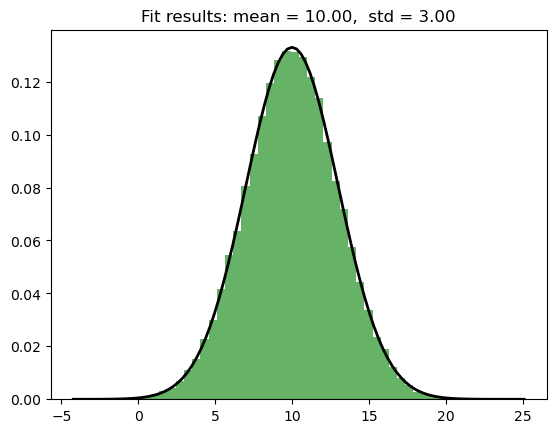

In [10]:
# Step 1: Generate the Sample
import numpy as np

# Generate the sample
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(mean, std_dev, sample_size)

# Step 2: Test for Normality
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(sample[:5000])  # Shapiro-Wilk test is computationally expensive, so we use a subset
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis (H0). The sample appears to come from a normal distribution.")
else:
    print("Reject the null hypothesis (H0). The sample does not appear to come from a normal distribution.")

#Step 3: Plot the Histogram and PDF
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot the histogram
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g')

# Plot the normal distribution PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mean = %.2f,  std = %.2f" % (mean, std_dev)
plt.title(title)
plt.show()

#### Explanation of Results
##### Shapiro-Wilk Test:

The Shapiro-Wilk test statistic and p-value are printed.
If the p-value is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis, indicating that the sample appears to come from a normal distribution.
If the p-value is less than or equal to the significance level, we reject the null hypothesis, indicating that the sample does not appear to come from a normal distribution.
Histogram and PDF:

The histogram shows the distribution of the sample values.
The overlaid normal distribution PDF should match the shape of the histogram if the sample is normally distributed.
***

## Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

|Patient ID|0|1|2|3|4|5|6|7|8|9|
|----------|-|-|-|-|-|-|-|-|-|-|
|Before|63|68|70|64|74|67|70|57|66|65|
|After|64|64|68|64|73|70|72|54|61|63|

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.